In [ ]:
#AMZN ticker  AMAZON

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

from yahoo_fin.stock_info import get_data

In [ ]:
#interval: {“1d”, “1wk”, “1mo”}. Refers to the interval to sample the data: “1d”= daily, “1wk”= weekly, “1mo”=monthly.

In [2]:
api_df= get_data("amzn", start_date="12/04/2010", end_date="07/04/2022", index_as_date = False, interval="1d")
api_df

,date,open,high,low,close,adjclose,volume,ticker
0,2010-12-06,8.776000,8.921500,8.730000,8.902500,8.902500,113084000,AMZN
1,2010-12-07,9.025000,9.073500,8.828500,8.838500,8.838500,101542000,AMZN
2,2010-12-08,8.874500,8.908000,8.760000,8.814500,8.814500,74538000,AMZN
3,2010-12-09,8.888500,8.905500,8.690000,8.742500,8.742500,91110000,AMZN
4,2010-12-10,8.744000,8.797500,8.668000,8.781000,8.781000,71310000,AMZN
...,...,...,...,...,...,...,...,...
2908,2022-06-27,117.089996,117.980003,112.699997,113.220001,113.220001,62133200,AMZN
2909,2022-06-28,113.500000,114.849998,107.040001,107.400002,107.400002,74942900,AMZN
2910,2022-06-29,107.379997,110.989998,106.910004,108.919998,108.919998,66375300,AMZN
2911,2022-06-30,108.110001,108.180000,102.519997,106.209999,106.209999,97679400,AMZN


In [3]:
#print the summary 
print(api_df.describe())

              open         high          low        close     adjclose  \
count  2913.000000  2913.000000  2913.000000  2913.000000  2913.000000   
mean     60.784937    61.453926    60.033075    60.754295    60.754295   
std      54.139053    54.766744    53.425571    54.083420    54.083420   
min       8.059500     8.177000     8.029500     8.048500     8.048500   
25%      15.158000    15.290000    14.966500    15.170000    15.170000   
50%      38.240501    38.494499    37.990002    38.236000    38.236000   
75%      92.567497    93.523003    91.588997    92.765999    92.765999   
max     187.199997   188.654007   184.839493   186.570496   186.570496   

             volume  
count  2.913000e+03  
mean   8.415458e+07  
std    4.575082e+07  
min    1.762600e+07  
25%    5.508400e+07  
50%    7.272000e+07  
75%    9.863800e+07  
max    4.826840e+08  


In [4]:
#prep the data 
api_df.set_index(pd.DatetimeIndex(api_df['date']), inplace=True)

In [5]:
#Keep the close for 2014-19
api_df = api_df[['close']]
api_df

,close
date,
2010-12-06,8.902500
2010-12-07,8.838500
2010-12-08,8.814500
2010-12-09,8.742500
2010-12-10,8.781000
...,...
2022-06-27,113.220001
2022-06-28,107.400002
2022-06-29,108.919998


In [6]:
print (api_df.index.max())

2022-07-01 00:00:00


In [7]:
data = api_df.filter(['close'])
dataset = data.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

training_data_len =math.ceil(len(dataset) *.7)
train_data =scaled_data[0:training_data_len , : ]


X_train_data = []
y_train_data = []

for i in range(1500,len(train_data)):
    X_train_data=list(X_train_data)
    y_train_data=list(y_train_data)
    X_train_data.append(train_data[i-1500:i,0])
    y_train_data.append(train_data[i,0])
    
    X_train_data1, y_train_data1 = np.array(X_train_data), np.array(y_train_data)
    
    X_train_data2 = np.reshape(X_train_data1,(X_train_data1.shape[0],X_train_data1.shape[1],1))

   
    
#1500 = number of days you can change it accordingly. 

# There will be a total of 60 values, 1st column will contain an index of 0-59
# The second will have an index of 1-60 ++_
# the y_train has the 60 st value on c1 and c2 will have 61++

In [8]:
#Build the LSTM MODEL 

model = Sequential()

model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train_data2.shape[1],1)))

model.add(LSTM(units=50, return_sequences=False))

model.add(Dense(units=25))

model.add(Dense(units=1))

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_data2, y_train_data1, batch_size=1, epochs=1)

540/540 [==============================] - 318s 572ms/step - loss: 0.0013


In [10]:
test_data = scaled_data[training_data_len -1500: , : ]

X_test = []

y_test = dataset[training_data_len : , : ]

for i in range(1500,len(test_data)):
    
    X_test.append(test_data[i-1500:i,0])

X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)

28/28 [==============================] - 10s 311ms/step


In [11]:
# Error calculation where RMSE = root mean squared error 

rmse=np.sqrt(np.mean(((predictions-y_test)**2)))

In [12]:
print(rmse)

8.277469131384883


C:\Users\rctay\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


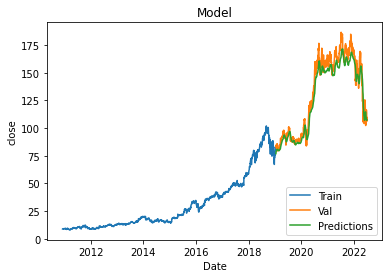

In [13]:
#Predict and visualize 

train = api_df[:training_data_len]

valid = api_df[training_data_len:]

valid['Predictions'] = predictions

plt.title('Model')

plt.xlabel('Date')

plt.ylabel('close')

plt.plot(train['close'])

plt.plot(valid[['close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

<AxesSubplot:xlabel='date'>

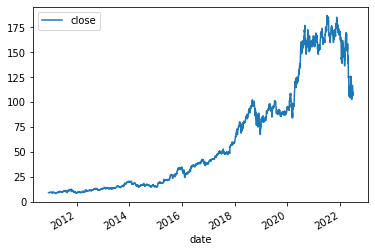

In [14]:
api_df.plot()